<a href="https://colab.research.google.com/github/Bhomic-OGJ/Digital-Watermarking-practice/blob/main/semiB_GJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 32.3 MB/s eta 0:00:00


In [41]:
dir = "/content/drive/MyDrive/PHD_DATA/pro_semiB_GJ/"
img_path = dir+"resized_img.jpg"
wm_path = dir+"resized_watermark.jpg"

In [12]:
import numpy as np
import pywt
from sklearn.linear_model import LinearRegression
import cv2
from google.colab.patches import cv2_imshow

# Function to add watermark
def add_watermark(image, watermark, strength=10):
    coeffs = pywt.wavedec2(image, 'haar', level=2)
    cA2, (cH2, cV2, cD2), (cH1, cV1, cD1) = coeffs

    # Quantization and embedding watermark
    quantized_cA2 = np.round(cA2 / strength)
    watermark_shape = np.min([quantized_cA2.shape, watermark.shape], axis=0)
    quantized_cA2[:watermark_shape[0], :watermark_shape[1]] += watermark[:watermark_shape[0], :watermark_shape[1]]

    # Reconstruct image
    coeffs = quantized_cA2, (cH2, cV2, cD2), (cH1, cV1, cD1)
    watermarked_image = pywt.waverec2(coeffs, 'haar')
    return watermarked_image

# Function to extract watermark
def extract_watermark(watermarked_image, original_image, strength=10):
    coeffs_wm = pywt.wavedec2(watermarked_image, 'haar', level=2)
    coeffs_org = pywt.wavedec2(original_image, 'haar', level=2)
    cA2_wm, _, _ = coeffs_wm
    cA2_org, _, _ = coeffs_org

    # Quantization
    quantized_cA2_wm = np.round(cA2_wm / strength)
    quantized_cA2_org = np.round(cA2_org / strength)

    # Extract watermark
    watermark = quantized_cA2_wm - quantized_cA2_org
    return watermark




In [10]:
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
watermark = cv2.imread(wm_path, cv2.IMREAD_GRAYSCALE)

Original Image


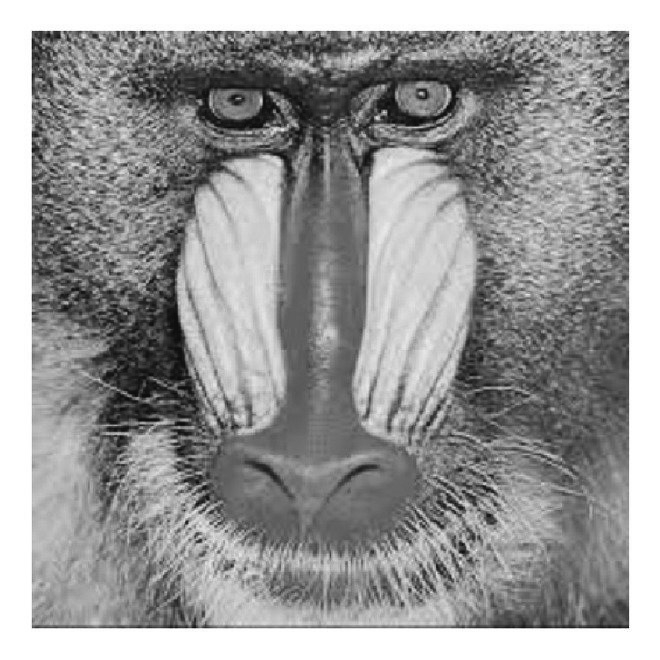

Watermarked Image


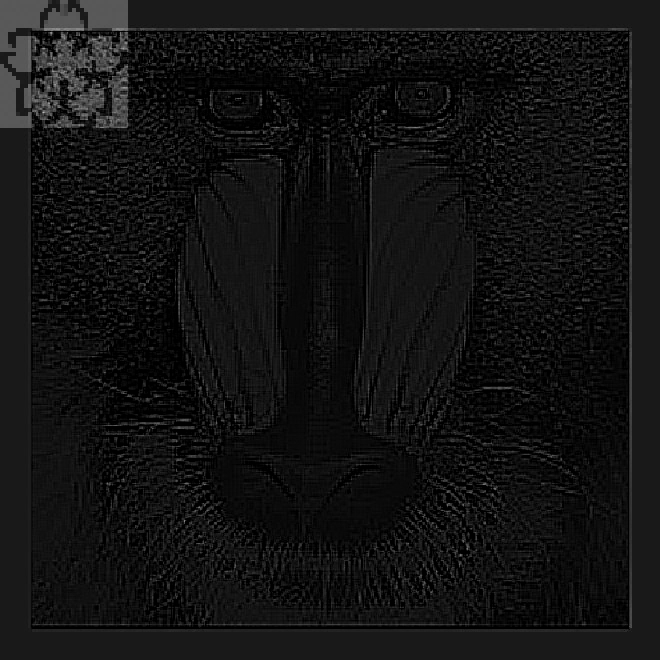

Extracted Watermark


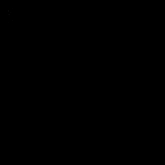

In [15]:
# Add watermark
watermarked_image = add_watermark(image, watermark)

# Extract watermark
extracted_watermark = extract_watermark(watermarked_image, image)

# Display results
print("Original Image")
cv2_imshow(image)
print("Watermarked Image")
cv2_imshow(watermarked_image)
print("Extracted Watermark")
cv2_imshow(extracted_watermark)

Try 2

In [16]:
import numpy as np
import cv2
from scipy.fftpack import dct, idct
from sklearn.linear_model import LinearRegression

def apply_dct(image):
    return dct(dct(image.T, norm='ortho').T, norm='ortho')

def apply_idct(dct_image):
    return idct(idct(dct_image.T, norm='ortho').T, norm='ortho')

def embed_watermark(image, watermark, strength=10):
    dct_image = apply_dct(image)
    # Embed watermark in the DCT domain, mid-frequency coefficients
    for i in range(watermark.shape[0]):
        for j in range(watermark.shape[1]):
            dct_image[i, j] += strength * watermark[i, j]
    watermarked_image = apply_idct(dct_image)
    return watermarked_image

def extract_watermark(watermarked_image, original_image, strength=10):
    dct_wm_image = apply_dct(watermarked_image)
    dct_org_image = apply_dct(original_image)

    # Prepare data for regression
    X = dct_org_image.flatten().reshape(-1, 1)  # Original DCT coefficients
    y = dct_wm_image.flatten()  # Watermarked DCT coefficients

    # Train linear regressor
    regressor = LinearRegression()
    regressor.fit(X, y)

    # Predict original DCT coefficients
    predicted_dct_org = regressor.predict(X).reshape(dct_org_image.shape)

    # Extract watermark
    extracted_watermark = (dct_wm_image - predicted_dct_org) / strength
    return extracted_watermark

In [17]:
cv2.imshow = cv2_imshow

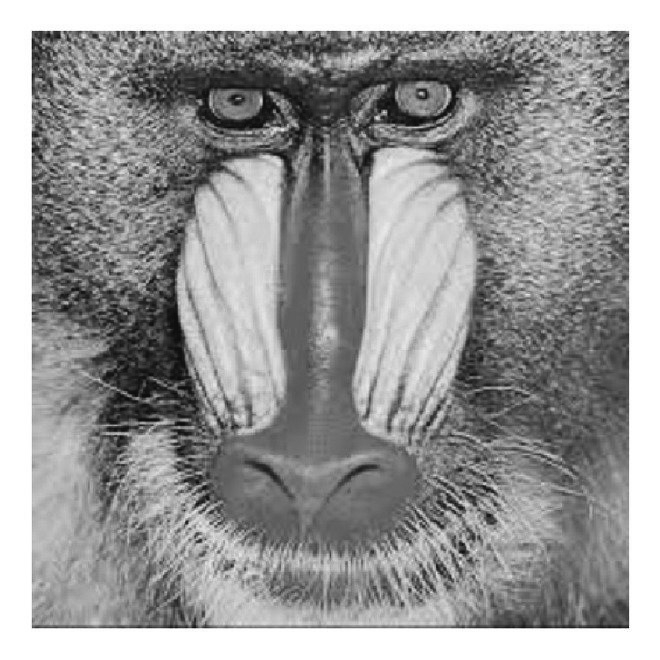

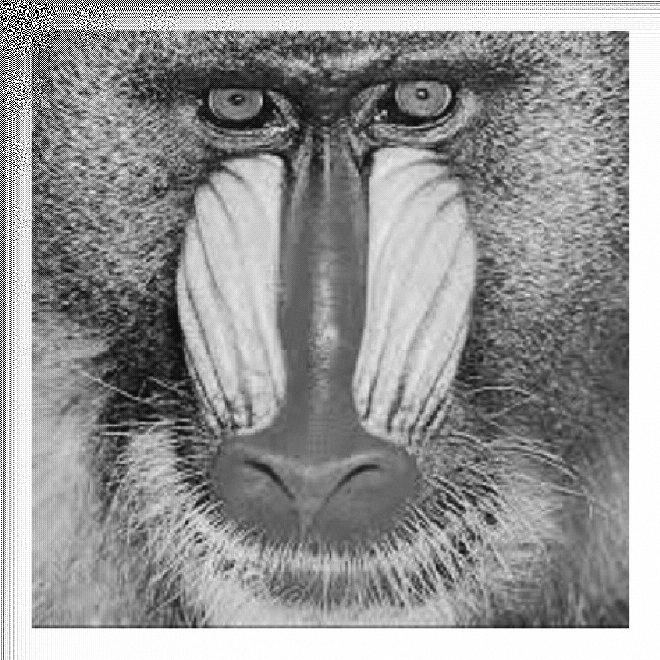

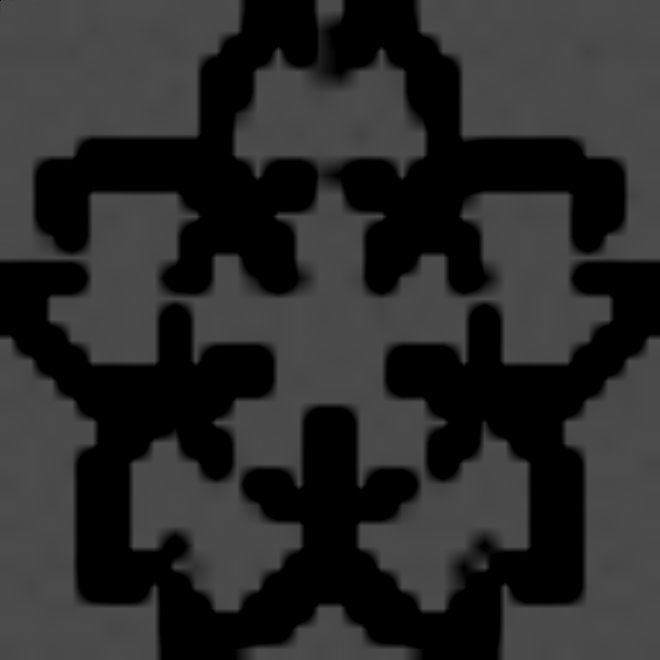

In [19]:
# Load images
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
watermark = cv2.imread(wm_path, cv2.IMREAD_GRAYSCALE)
watermark = cv2.resize(watermark, (image.shape[1], image.shape[0]))  # Ensure watermark size matches image size

# Add watermark
strength = 10
watermarked_image = embed_watermark(image, watermark, strength)

# Extract watermark
extracted_watermark = extract_watermark(watermarked_image, image, strength)

# Display results
cv2.imshow(image)
cv2.imshow(watermarked_image)
cv2.imshow(extracted_watermark)

Try 3

In [20]:
import numpy as np
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import Ridge

def train_os_rkelm(CXRs, k=4, C=1.0, L=1024, Q=32):
    Y = []

    for CXR in CXRs:
        # Perform k-level DWT
        LLk, LHk, HLk, HHk = dwt(CXR, k)

        # Reshape LLk sub-band matrix into a vector
        V = LLk.reshape(-1)

        # Concatenate vector V to Y
        Y.append(V)

    Y = np.concatenate(Y)

    # Quantize Y
    E = np.round(Y / Q)

    # Obtain the optimal model OS-RKELM_Model
    rbf_feature = RBFSampler(gamma=1.0, n_components=L, random_state=1)
    E_features = rbf_feature.fit_transform(E.reshape(-1, 1))
    model = Ridge(alpha=C).fit(E_features, Y)

    return model

def dwt(image, k):
    # Placeholder for DWT function
    pass

# Example usage
CXRs = [...]  # List of pre-processed training CXR images
model = train_os_rkelm(CXRs)


TypeError: cannot unpack non-iterable NoneType object

In [21]:
import numpy as np

def embed_watermark(model, CXR_host, W, k=4, Q=32):
    # Apply U-Net to determine ROI and RONI (placeholder)
    ROI, RONI = apply_unet(CXR_host)

    # Perform k-level DWT
    LLk, LHk, HLk, HHk = dwt(CXR_host, k)

    # Reshape LLk sub-band matrix into a vector
    X = LLk.reshape(-1)

    # Quantize vector X
    F = np.round(X / Q)

    # Generate modulated coefficient vector P'
    P_prime = model.predict(F.reshape(-1, 1))

    # Reshape the watermark and apply logistic chaotic map
    W_enc = logistic_map(W.reshape(-1))

    # Generate vector C' by embedding the watermark
    alpha = 0.03 if ROI else 0.1
    C_prime = P_prime + alpha * W_enc

    # Reshape vector C' to obtain watermarked sub-band matrix LL'_k
    LL_prime_k = C_prime.reshape(LLk.shape)

    # Perform inverse k-level DWT to get the signed CXR image
    CXR_signed = idwt(LL_prime_k, LHk, HLk, HHk)

    return CXR_signed

def apply_unet(image):
    # Placeholder for U-Net application
    pass

def logistic_map(data):
    # Placeholder for logistic map function
    pass

def idwt(LL, LH, HL, HH):
    # Placeholder for inverse DWT function
    pass

# Example usage
CXR_host = ...  # Host CXR image
W = ...  # Binary watermark
CXR_signed = embed_watermark(model, CXR_host, W)


NameError: name 'model' is not defined

In [22]:
import numpy as np

def extract_watermark(CXR_signed, model, k=4, Q=32):
    # Perform k-level DWT
    LL4, LH4, HL4, HH4 = dwt(CXR_signed, k)

    # Reshape LL4 sub-band matrix into a vector
    X_double_prime = LL4.reshape(-1)

    # Quantize vector X''
    G = np.round(X_double_prime / Q)

    # Generate modulated coefficient vector P''
    P_double_prime = model.predict(G.reshape(-1, 1))

    # Extract the watermark
    alpha = 0.03  # Assuming ROI for simplicity
    W_vec = (X_double_prime - P_double_prime) / alpha

    # Decode the watermark using inverse logistic map
    W_decoded = inverse_logistic_map(W_vec)

    # Reconstruct the CXR image
    LL_prime_k = P_double_prime.reshape(LL4.shape)
    CXR_reconstructed = idwt(LL_prime_k, LH4, HL4, HH4)

    return W_decoded, CXR_reconstructed

def inverse_logistic_map(data):
    # Placeholder for inverse logistic map function
    pass

# Example usage
CXR_signed = ...  # Signed CXR image
W_decoded, CXR_reconstructed = extract_watermark(CXR_signed, model)


NameError: name 'model' is not defined

Try 4

In [101]:
import numpy as np
import cv2
import pywt
from scipy.fftpack import dct, idct
from sklearn.linear_model import Ridge
from sklearn.kernel_approximation import RBFSampler

def apply_dct(image):
    return dct(dct(image.T, norm='ortho').T, norm='ortho')

def apply_idct(dct_image):
    return idct(idct(dct_image.T, norm='ortho').T, norm='ortho')

def dwt(image, k):
    coeffs = pywt.wavedec2(image, 'haar', level=k)
    LLk = coeffs[0]
    return LLk, coeffs[1:]

def idwt(coeffs):
    return pywt.waverec2(coeffs, 'haar')

def logistic_map(data, r=3.9):
    return r * data * (1 - data)

def inverse_logistic_map(data, r=3.9):
    return (1 - np.sqrt(1 - 4 * data / r)) / 2

def train_os_rkelm(CXRs, k=4, C=1.0, L=1024, Q=32):
    Y = []
    for CXR in CXRs:
        LLk, _ = dwt(CXR, k)
        V = LLk.reshape(-1)
        Y.append(V)
    Y = np.concatenate(Y)
    E = np.round(Y / Q)
    rbf_feature = RBFSampler(gamma=1.0, n_components=L, random_state=1)

    print("E.reshape(-1, 1): ", E.reshape(-1, 1).shape)
    E_features = rbf_feature.fit_transform(E.reshape(-1, 1))
    model = Ridge(alpha=C).fit(E_features, Y)
    return model, rbf_feature

# def embed_watermark(model, CXR_host, W, k=4, Q=32):
#     LLk, subbands = dwt(CXR_host, k)
#     X = LLk.reshape(-1)
#     F = np.round(X / Q)

#     print("LLk shape: ", LLk.shape, "X shape: ", X.shape, ", F shape: ", F.shape, ", F.reshape(-1, 1).shape: ", F.reshape(-1, 1).shape)

#     P_prime = model.predict(F.reshape(-1, 1))
#     W_enc = logistic_map(W.reshape(-1))
#     alpha = 0.03  # Use different alpha for ROI/RONI if needed
#     C_prime = P_prime + alpha * W_enc
#     LL_prime_k = C_prime.reshape(LLk.shape)
#     CXR_signed = idwt([LL_prime_k] + subbands)
#     return CXR_signed

def embed_watermark(model, rbf_feature, CXR_host, W, k=4, Q=32):
    LLk, subbands = dwt(CXR_host, k)
    X = LLk.reshape(-1)
    F = np.round(X / Q)
    F_features = rbf_feature.transform(F.reshape(-1, 1))
    P_prime = model.predict(F_features)
    W_enc = logistic_map(W.reshape(-1))
    alpha = 0.03  # Use different alpha for ROI/RONI if needed

    print("w_enc.shape: ", W.reshape(-1).shape)

    C_prime = P_prime + alpha * W_enc

    LL_prime_k = C_prime.reshape(LLk.shape)
    CXR_signed = idwt([LL_prime_k] + subbands)
    return CXR_signed

def extract_watermark(CXR_signed, model, k=4, Q=32):
    LL4, subbands = dwt(CXR_signed, k)
    X_double_prime = LL4.reshape(-1)
    G = np.round(X_double_prime / Q)
    P_double_prime = model.predict(G.reshape(-1, 1))
    alpha = 0.03  # Use different alpha for ROI/RONI if needed
    W_vec = (X_double_prime - P_double_prime) / alpha
    W_decoded = inverse_logistic_map(W_vec)
    LL_prime_k = P_double_prime.reshape(LL4.shape)
    CXR_reconstructed = idwt([LL_prime_k] + subbands)
    return W_decoded, CXR_reconstructed

In [102]:

# Load training CXR images (for demonstration, using the same image multiple times)
CXR1 = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
CXR2 = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
CXR3 = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
CXRs = [CXR1, CXR2, CXR3]

In [103]:
CXR1.shape

(512, 512)

In [104]:
# Train the OS-RKELM model
model, rbf_feature = train_os_rkelm(CXRs)

E.reshape(-1, 1):  (3072, 1)


In [105]:
# Load host CXR image and watermark
CXR_host = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
watermark = cv2.imread(wm_path, cv2.IMREAD_GRAYSCALE)
watermark = cv2.resize(watermark, (CXR_host.shape[1], CXR_host.shape[0]))

print("CXR_host", CXR_host.shape)

# Embed the watermark
CXR_signed = embed_watermark(model, rbf_feature, CXR_host, watermark)

CXR_host (512, 512)
w_enc.shape:  (262144,)


ValueError: operands could not be broadcast together with shapes (1024,) (262144,) 

In [64]:
# Save and display the watermarked image
cv2.imwrite('watermarked_image.png', CXR_signed)
cv2.imshow('Watermarked Image', CXR_signed)
cv2.waitKey(0)

# Extract the watermark and recover the original CXR image
extracted_watermark, CXR_reconstructed = extract_watermark(CXR_signed, model)

# Save and display the results
cv2.imwrite('extracted_watermark.png', extracted_watermark.reshape(watermark.shape))
cv2.imwrite('reconstructed_CXR.png', CXR_reconstructed)
cv2.imshow('Extracted Watermark', extracted_watermark.reshape(watermark.shape))
cv2.imshow('Reconstructed CXR', CXR_reconstructed)
cv2.waitKey(0)
cv2.destroyAllWindows()

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'imwrite'
> Overload resolution failed:
>  - img is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'img'


Try 5

In [111]:
def show(name, img):
  print(name)
  cv2_imshow(img)
cv2.imshow = show

Watermarked Image


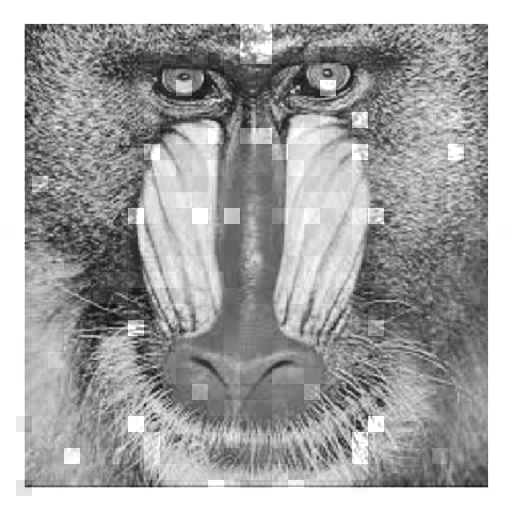

Extracted Watermark


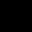

Reconstructed CXR


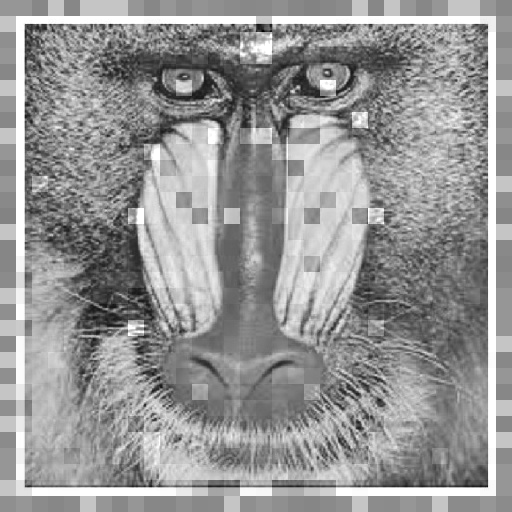

In [113]:
import numpy as np
import cv2
import pywt
from scipy.fftpack import dct, idct
from sklearn.linear_model import Ridge
from sklearn.kernel_approximation import RBFSampler

def apply_dct(image):
    return dct(dct(image.T, norm='ortho').T, norm='ortho')

def apply_idct(dct_image):
    return idct(idct(dct_image.T, norm='ortho').T, norm='ortho')

def dwt(image, k):
    coeffs = pywt.wavedec2(image, 'haar', level=k)
    LLk = coeffs[0]
    return LLk, coeffs[1:]

def idwt(coeffs):
    return pywt.waverec2(coeffs, 'haar')

def logistic_map(data, r=3.9):
    return r * data * (1 - data)

# def inverse_logistic_map(data, r=3.9):
#     return (1 - np.sqrt(1 - 4 * data / r)) / 2

def inverse_logistic_map(data, r=3.9):
    valid_data = np.clip(data, 0, r/4)
    return (1 - np.sqrt(1 - 4 * valid_data / r)) / 2

def train_os_rkelm(CXRs, k=4, C=1.0, L=1024, Q=32):
    Y = []
    for CXR in CXRs:
        LLk, _ = dwt(CXR, k)
        V = LLk.reshape(-1)
        Y.append(V)
    Y = np.concatenate(Y)
    E = np.round(Y / Q)
    rbf_feature = RBFSampler(gamma=1.0, n_components=L, random_state=1)
    E_features = rbf_feature.fit_transform(E.reshape(-1, 1))
    model = Ridge(alpha=C).fit(E_features, Y)
    return model, rbf_feature

def embed_watermark(model, rbf_feature, CXR_host, W, k=4, Q=32):
    LLk, subbands = dwt(CXR_host, k)
    X = LLk.reshape(-1)
    F = np.round(X / Q)
    F_features = rbf_feature.transform(F.reshape(-1, 1))
    P_prime = model.predict(F_features)

    # Resize watermark to match P_prime
    W_resized = cv2.resize(W, LLk.shape)
    W_enc = logistic_map(W_resized.reshape(-1))

    alpha = 0.03  # Use different alpha for ROI/RONI if needed
    C_prime = P_prime + alpha * W_enc
    LL_prime_k = C_prime.reshape(LLk.shape)
    CXR_signed = idwt([LL_prime_k] + subbands)
    return CXR_signed

def extract_watermark(CXR_signed, model, rbf_feature, k=4, Q=32):
    LL4, subbands = dwt(CXR_signed, k)
    X_double_prime = LL4.reshape(-1)
    G = np.round(X_double_prime / Q)
    G_features = rbf_feature.transform(G.reshape(-1, 1))
    P_double_prime = model.predict(G_features)

    alpha = 0.03  # Use different alpha for ROI/RONI if needed
    W_vec = (X_double_prime - P_double_prime) / alpha
    W_decoded = inverse_logistic_map(W_vec)

    LL_prime_k = P_double_prime.reshape(LL4.shape)
    CXR_reconstructed = idwt([LL_prime_k] + subbands)
    return W_decoded.reshape(LL4.shape), CXR_reconstructed

# Main function to run the full process
if __name__ == "__main__":
    # Load training CXR images (for demonstration, using the same image multiple times)
    CXR1 = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    CXR2 = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    CXR3 = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    CXRs = [CXR1, CXR2, CXR3]

    # Train the OS-RKELM model
    model, rbf_feature = train_os_rkelm(CXRs)

    # Load host CXR image and watermark
    CXR_host = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    watermark = cv2.imread(wm_path, cv2.IMREAD_GRAYSCALE)
    watermark = cv2.resize(watermark, (CXR_host.shape[1], CXR_host.shape[0]))

    # Embed the watermark
    CXR_signed = embed_watermark(model, rbf_feature, CXR_host, watermark)

    # Save and display the watermarked image
    cv2.imwrite('watermarked_image.png', CXR_signed)
    cv2.imshow('Watermarked Image', CXR_signed)
    cv2.waitKey(0)

    # Extract the watermark and recover the original CXR image
    extracted_watermark, CXR_reconstructed = extract_watermark(CXR_signed, model, rbf_feature)

    # Save and display the results
    cv2.imwrite('extracted_watermark.png', extracted_watermark)
    cv2.imwrite('reconstructed_CXR.png', CXR_reconstructed)
    cv2.imshow('Extracted Watermark', extracted_watermark)
    cv2.imshow('Reconstructed CXR', CXR_reconstructed)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


Try 6

Watermarked Image


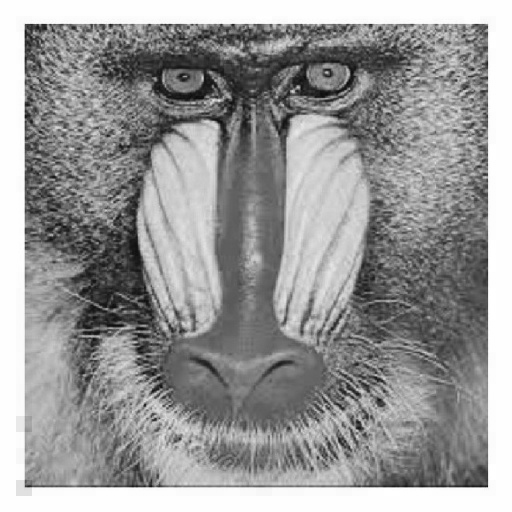

Extracted Watermark


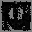

Reconstructed CXR


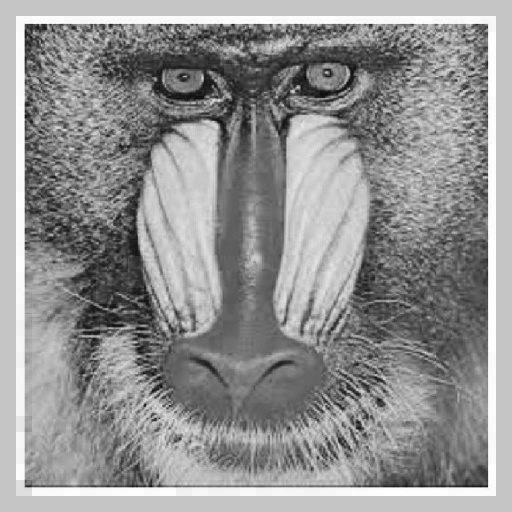

In [115]:
import numpy as np
import cv2
import pywt
from scipy.fftpack import dct, idct
from sklearn.linear_model import Ridge
from sklearn.kernel_approximation import RBFSampler

def apply_dct(image):
    return dct(dct(image.T, norm='ortho').T, norm='ortho')

def apply_idct(dct_image):
    return idct(idct(dct_image.T, norm='ortho').T, norm='ortho')

def dwt(image, k):
    coeffs = pywt.wavedec2(image, 'haar', level=k)
    LLk = coeffs[0]
    return LLk, coeffs[1:]

def idwt(coeffs):
    return pywt.waverec2(coeffs, 'haar')

def logistic_map(data, r=3.9):
    return r * data * (1 - data)

def inverse_logistic_map(data, r=3.9):
    valid_data = np.clip(data, 0, r/4)
    return (1 - np.sqrt(1 - 4 * valid_data / r)) / 2

def train_os_rkelm(CXRs, k=4, C=1.0, L=1024, Q=32):
    Y = []
    for CXR in CXRs:
        LLk, _ = dwt(CXR, k)
        V = LLk.reshape(-1)
        Y.append(V)
    Y = np.concatenate(Y)
    E = np.round(Y / Q)
    rbf_feature = RBFSampler(gamma=1.0, n_components=L, random_state=1)
    E_features = rbf_feature.fit_transform(E.reshape(-1, 1))
    model = Ridge(alpha=C).fit(E_features, Y)
    return model, rbf_feature

def embed_watermark(model, rbf_feature, CXR_host, W, k=4, Q=32):
    LLk, subbands = dwt(CXR_host, k)
    X = LLk.reshape(-1)
    F = np.round(X / Q)
    F_features = rbf_feature.transform(F.reshape(-1, 1))
    P_prime = model.predict(F_features)

    # Resize watermark to match P_prime
    W_resized = cv2.resize(W, LLk.shape)
    W_enc = logistic_map(W_resized / 255.0).reshape(-1)

    alpha = 0.03  # Use different alpha for ROI/RONI if needed
    C_prime = P_prime + alpha * W_enc
    LL_prime_k = C_prime.reshape(LLk.shape)
    CXR_signed = idwt([LL_prime_k] + subbands)
    return CXR_signed

def extract_watermark(CXR_signed, model, rbf_feature, k=4, Q=32):
    LL4, subbands = dwt(CXR_signed, k)
    X_double_prime = LL4.reshape(-1)
    G = np.round(X_double_prime / Q)
    G_features = rbf_feature.transform(G.reshape(-1, 1))
    P_double_prime = model.predict(G_features)

    alpha = 0.03  # Use different alpha for ROI/RONI if needed
    W_vec = (X_double_prime - P_double_prime) / alpha
    W_decoded = inverse_logistic_map(W_vec).reshape(LL4.shape)

    LL_prime_k = P_double_prime.reshape(LL4.shape)
    CXR_reconstructed = idwt([LL_prime_k] + subbands)
    return W_decoded, CXR_reconstructed

# Main function to run the full process
if __name__ == "__main__":
    # Load training CXR images (for demonstration, using the same image multiple times)
    CXR1 = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    CXR2 = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    CXR3 = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    CXRs = [CXR1, CXR2, CXR3]

    # Train the OS-RKELM model
    model, rbf_feature = train_os_rkelm(CXRs)

    # Load host CXR image and watermark
    CXR_host = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    watermark = cv2.imread(wm_path, cv2.IMREAD_GRAYSCALE)
    watermark = cv2.resize(watermark, (CXR_host.shape[1], CXR_host.shape[0]))

    # Embed the watermark
    CXR_signed = embed_watermark(model, rbf_feature, CXR_host, watermark)

    # Save and display the watermarked image
    cv2.imwrite('watermarked_image.png', CXR_signed)
    cv2.imshow('Watermarked Image', CXR_signed)
    cv2.waitKey(0)

    # Extract the watermark and recover the original CXR image
    extracted_watermark, CXR_reconstructed = extract_watermark(CXR_signed, model, rbf_feature)

    # Save and display the results
    cv2.imwrite('extracted_watermark.png', (extracted_watermark * 255).astype(np.uint8))
    cv2.imwrite('reconstructed_CXR.png', CXR_reconstructed)
    cv2.imshow('Extracted Watermark', (extracted_watermark * 255).astype(np.uint8))
    cv2.imshow('Reconstructed CXR', CXR_reconstructed)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
